In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Set plotting style
sns.set_theme(style="whitegrid")

# Allow pandas to display the full text content of columns
pd.set_option('display.max_colwidth', None)

# Load the evaluation results
try:
    df = pd.read_csv('../../data/evaluate/rag_evaluation_reportV3.csv')
    print("Evaluation results loaded successfully.")
    print(f"Total QA pairs evaluated: {len(df)}")
except FileNotFoundError:
    print("Error: 'rag_evaluation_report.csv' not found. Please make sure the file is in the correct directory.")

# Display basic info and the first few rows
if 'df' in locals():
    print("\nDataFrame Info:")
    df.info()
    print("\nFirst 5 Rows:")
    display(df.head())

Evaluation results loaded successfully.
Total QA pairs evaluated: 100

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Query               100 non-null    object 
 1   Query_Length        100 non-null    int64  
 2   Retrieval_Time_MS   100 non-null    float64
 3   Generation_Time_MS  100 non-null    float64
 4   Total_Time_MS       100 non-null    float64
 5   Generated_Answer    100 non-null    object 
 6   Expected_Answer     100 non-null    object 
 7   BLEU                100 non-null    float64
 8   ROUGE-1             100 non-null    float64
 9   ROUGE-2             100 non-null    float64
 10  ROUGE-L             100 non-null    float64
 11  METEOR              100 non-null    float64
 12  BERTScore-P         100 non-null    float64
 13  BERTScore-R         100 non-null    float64
 14  BERTScore-F1        

,Query,Query_Length,Retrieval_Time_MS,Generation_Time_MS,Total_Time_MS,Generated_Answer,Expected_Answer,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,METEOR,BERTScore-P,BERTScore-R,BERTScore-F1,Perplexity
0,What is the definition of the White Coat Phenomenon (WCP)?,58,119.8227,4419.1121,4552.7541,"The White Coat Phenomenon (WCP) is not explicitly defined in the provided KNOWLEDGE BASE. However, it is mentioned as one of the four terms used in this report, along with White Coat Effect (WCE), White Coat Hypertension (WCH), and White Coat UnControlled Hypertension (WUCH) [Source: 11906_2024_Article_1309.pdf].","WCP is the phenomenon where the BP in an office setting is higher than current guidelines recommend (thus in the ‘hypertensive’ range), whether or not a person is on BP medication, while the out-of-office BP (in the same person) is below current guideline recommendation for out-of-office BP goals.",4.886999e-155,0.235294,0.040000,0.156863,0.173611,0.676110,0.695645,0.685739,14.262301
1,What are the five most predictive variables for White Coat Effect (WCE) found by a machine learning algorithm study?,116,10.3046,4980.3988,4998.8174,"The five most predictive variables for White Coat Effect (WCE) found by a machine learning algorithm study are:\n\n1. Office diastolic pressure\n2. Office systolic pressure\n3. Kidney function (estimated glomerular filtration rate)\n4. Blood glucose concentration\n5. Current smoking\n\nThese variables were derived from a study that used a Random Forest matrix plot as the best approach to predict the likelihood of WCE, and were found to be the most predictive variables, rank ordered [Source: 11906_2024_Article_1309.pdf].","The five most predictive variables, rank ordered, were office diastolic pressure, followed by office systolic pressure, kidney function (estimated glomerular filtration rate), blood glucose concentration and current smoking.",1.571777e-01,0.495413,0.336449,0.403670,0.746268,0.714047,0.892490,0.793359,16.981689
2,Is White Coat Uncontrolled Hypertension (WUCH) associated with any increased cardiovascular risk?,97,11.0484,5592.3637,5611.6644,"White coat hypertension is relatively common, carries a small but definite increase in cardiovascular risk, and is prone to conversion to sustained hypertension [Source: 11906_2024_Article_1309.pdf]. Meta-analyses of studies conducted in adults have demonstrated that white coat hypertension conveys a cardiovascular risk that is intermediate between normotension and sustained hypertension [Source: nihms-1820707.pdf]. Adults with white coat hypertension have slightly higher rates of cardiovascular morbidity and mortality, higher left ventricular mass index, and greater common carotid artery intimal-media thickness [Source: nihms-1820707.pdf].",Meta-analytic data suggest that WUCH is not associated with any elevated risk.,8.726095e-232,0.098039,0.000000,0.078431,0.117925,0.580278,0.774277,0.663385,10.029049
3,What was the prevalence of Left Ventricular Diastolic Dysfunction (LVDD) at baseline in the community hypertension cohort study?,128,10.6025,1139.2633,1157.5200,I do not have sufficient information to answer that question.,"At baseline, 35 of the 283 hypertensions were diagnosed with LVDD, which corresponds to a prevalence of 12.3%.",4.376462e-232,0.068966,0.000000,0.068966,0.047847,0.708467,0.651577,0.678832,11.640772
4,How did the frequency of LVDD differ between men and women in the study?,72,10.9039,2084.1431,2102.3477,"The study demonstrated that women had increased LAVI compared with men, suggesting that women had more frequent LVDD [Source: 12872_2022_Article_2709.pdf].",Women had a higher frequency of LVDD (15.5%) than men (8%).,1.152228e-231,0.222222,0.058824,0.166667,0.198930,0.679195,0.739355,0.708000,52.584492


In [15]:
if 'df' in locals():
    # Select only the numeric metric columns for summary
    metric_columns = [
        'Retrieval_Time_MS', 'Generation_Time_MS', 'Total_Time_MS',
        'BLEU', 'ROUGE-1', 'ROUGE-L', 'BERTScore-F1', 'Perplexity'
    ]
    
    # Calculate the mean for each metric
    summary = df[metric_columns].mean().reset_index()
    summary.columns = ['Metric', 'Average Score']
    
    print("--- Overall Performance Summary (Averages) ---")
    display(summary)

--- Overall Performance Summary (Averages) ---


,Metric,Average Score
0,Retrieval_Time_MS,12.100342
1,Generation_Time_MS,2184.912308
2,Total_Time_MS,2204.923674
3,BLEU,0.071563
4,ROUGE-1,0.248153
5,ROUGE-L,0.205831
6,BERTScore-F1,0.730643
7,Perplexity,25.825075


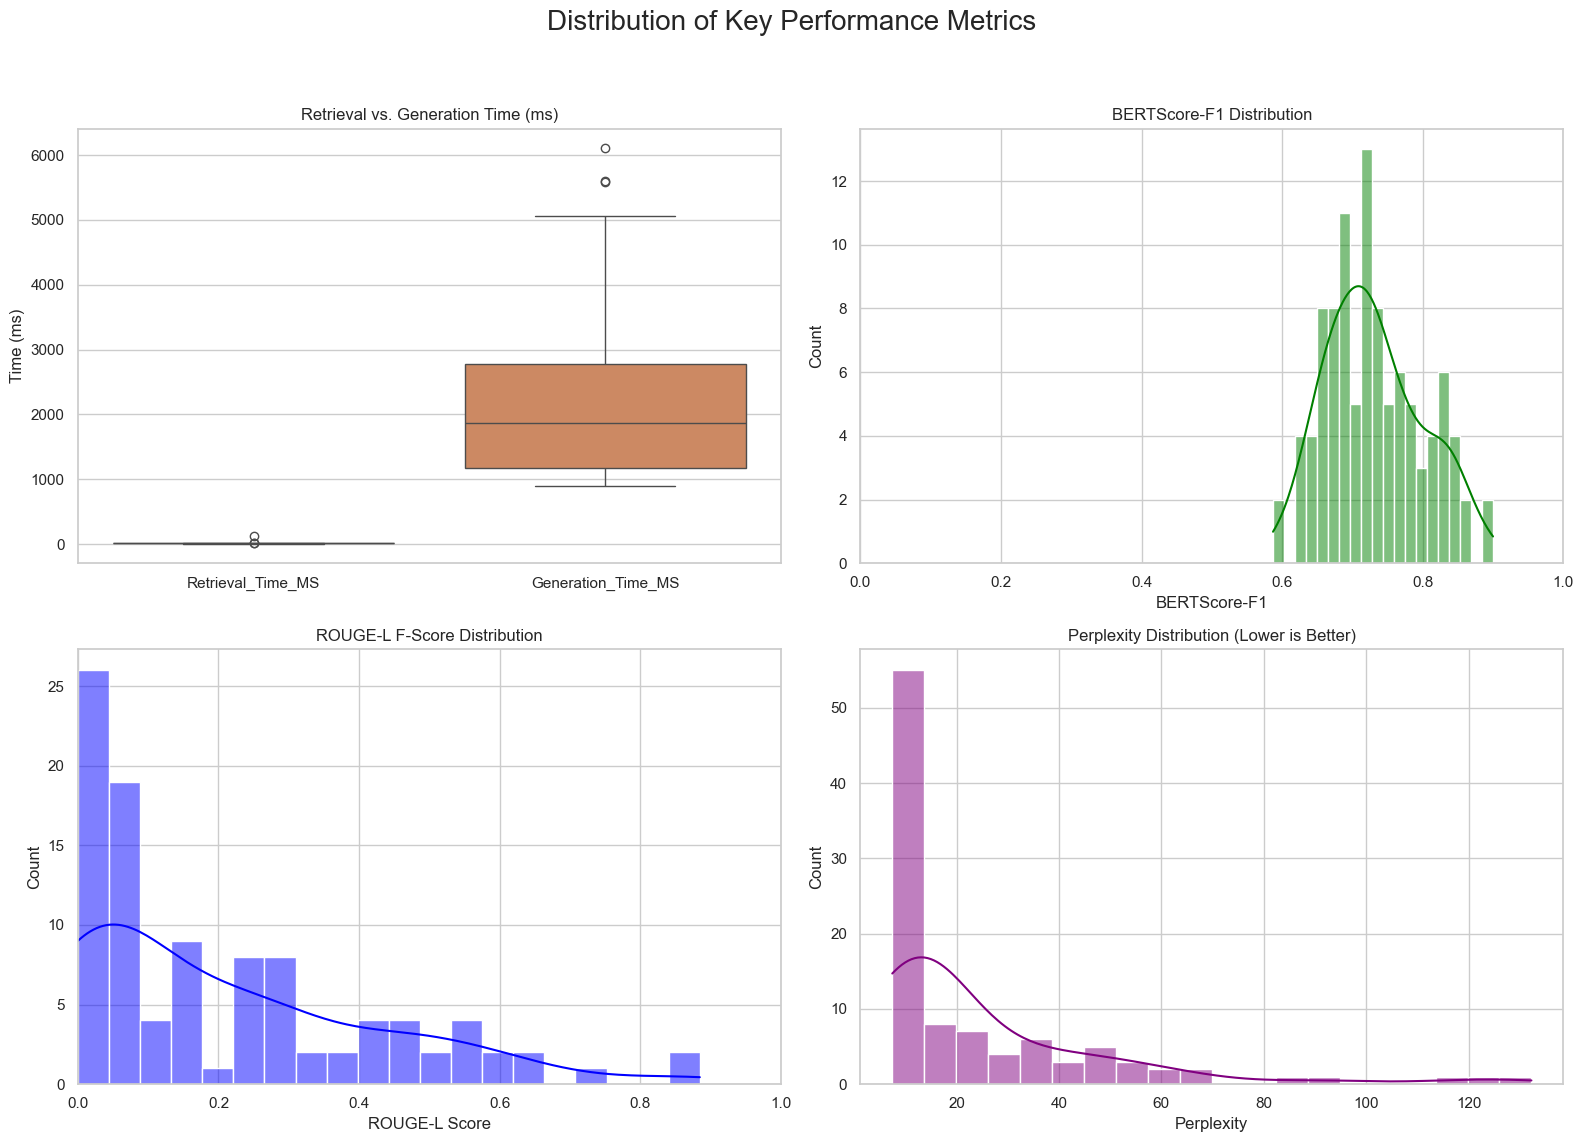

In [16]:
if 'df' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Distribution of Key Performance Metrics', fontsize=20)

    # 1. Timing Analysis
    sns.boxplot(data=df[['Retrieval_Time_MS', 'Generation_Time_MS']], ax=axes[0, 0])
    axes[0, 0].set_title('Retrieval vs. Generation Time (ms)')
    axes[0, 0].set_ylabel('Time (ms)')

    # 2. Semantic Similarity (BERTScore)
    sns.histplot(df['BERTScore-F1'], kde=True, ax=axes[0, 1], color='green', bins=20)
    axes[0, 1].set_title('BERTScore-F1 Distribution')
    axes[0, 1].set_xlabel('BERTScore-F1')
    axes[0, 1].set_xlim(0, 1)

    # 3. Lexical Similarity (ROUGE-L)
    sns.histplot(df['ROUGE-L'], kde=True, ax=axes[1, 0], color='blue', bins=20)
    axes[1, 0].set_title('ROUGE-L F-Score Distribution')
    axes[1, 0].set_xlabel('ROUGE-L Score')
    axes[1, 0].set_xlim(0, 1)

    # 4. Fluency (Perplexity)
    sns.histplot(df['Perplexity'].dropna(), kde=True, ax=axes[1, 1], color='purple', bins=20)
    axes[1, 1].set_title('Perplexity Distribution (Lower is Better)')
    axes[1, 1].set_xlabel('Perplexity')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [17]:
if 'df' in locals():
    print("--- Failure Analysis: 5 Lowest BERTScore-F1 Results ---")
    
    worst_answers = df.sort_values(by='BERTScore-F1', ascending=True).head(5)
    
    # Display the relevant columns for analysis
    display(worst_answers[['Query', 'Generated_Answer', 'Expected_Answer', 'BERTScore-P', 'BERTScore-R', 'BERTScore-F1', 'ROUGE-L']])

--- Failure Analysis: 5 Lowest BERTScore-F1 Results ---


,Query,Generated_Answer,Expected_Answer,BERTScore-P,BERTScore-R,BERTScore-F1,ROUGE-L
57,"In the outpatient study of hypertensive patients with COVID-19, were ACE inhibitors or ARBs associated with the risk of hospitalization?","Our study findings do not support a change to the current use of angiotensin-converting enzyme inhibitors and angiotensin receptor blockers among patients with hypertension being managed in the outpatient setting and at risk of infection with SARS-CoV-2 [Source: JAH3-10-e018086.pdf]. Overall, these drugs did not confer additional risk or benefit in terms of hospitalization [Source: JAH3-10-e018086.pdf].","In the outpatient study, neither ACE inhibitors (hazard ratio [HR], 0.77; 95% CI, 0.53–1.13, P=0.18) nor ARBs (HR, 0.88; 95% CI, 0.61–1.26, P=0.48) were associated with hospitalization risk.",0.629001,0.550267,0.587005,0.096154
98,Was hypertension associated with a higher risk of severe COVID-19 in the UK Biobank study?,I do not have sufficient information to answer that question.,"Yes, hypertension was associated with 22% higher odds of severe COVID-19 (Odds ratio (OR) 1.22; 95% confidence interval (CI) 1.12, 1.33) compared with normotension after adjusting for confounding variables.",0.672248,0.530733,0.593167,0.000000
99,"In treated hypertensive individuals, what was the relationship between systolic blood pressure (SBP) and the risk of severe COVID-19?",I do not have sufficient information to answer that question.,"There was a J-shaped relationship; elevated SBP showed a dose-response relationship with severe COVID-19 (e.g., SBP 150-159mmHg had an OR of 1.91), and SBP <120mmHg was also associated with greater odds of severe COVID-19 (OR 1.40).",0.670008,0.583731,0.623901,0.000000
43,What is the definition of resistant hypertension (RH) used in the Nigerian study?,I do not have sufficient information to answer that question.,"Resistant hypertension was defined as blood pressure ≥140/90 mmHg despite the use of ≥3 guideline-recommended antihypertensive medications including a diuretic, renin-angiotensin system blocker and calcium-channel blocker at optimal or best-tolerated doses, or blood pressure <140/90 mmHg on ≥4 antihypertensive medications.",0.668502,0.584907,0.623917,0.000000
95,How did ACE inhibitors and ARBs compare in their effect on the glucose infusion rate (GIR) in hypertensive patients?,I do not have sufficient information to answer that question.,"The efficacy of ACE inhibitors on improving the glucose infusion rate (GIR) was significantly better than that of ARBs (WMD = -1.09, 95% CI: -1.34 to -0.85, P < 0.001).",0.696999,0.574995,0.630146,0.047619


In [18]:
if 'df' in locals():
    print("\n--- Success Analysis: 5 Highest BERTScore-F1 Results ---")
    
    best_answers = df.sort_values(by='BERTScore-F1', ascending=False).head(5)
    
    # Display the relevant columns for analysis
    display(best_answers[['Query', 'Generated_Answer', 'Expected_Answer', 'BERTScore-P', 'BERTScore-R', 'BERTScore-F1', 'ROUGE-L']])


--- Success Analysis: 5 Highest BERTScore-F1 Results ---


,Query,Generated_Answer,Expected_Answer,BERTScore-P,BERTScore-R,BERTScore-F1,ROUGE-L
37,"In the Health and Retirement Study, how did a diagnosis of hypertension affect a person's subjective life expectancy?","A diagnosis of hypertension is associated with lower subjective life expectancy (SLE), regardless of measured blood pressure [Source: gbab022.pdf].","A diagnosis of hypertension is associated with lower subjective life expectancy (SLE), regardless of the person's measured blood pressure.",0.857511,0.946751,0.899924,0.850000
54,"In Dahl salt-sensitive rats, what was the effect of switching from a high-salt to a low-salt diet on the vasoconstriction of mesenteric small arteries (MSAs) to norepinephrine?","Switching from a high-salt diet to a low-salt diet (i.e., salt restriction) attenuated the vasoconstriction of the MSAs to norepinephrine [Source: ijmsv20p0572.pdf].","Switching from a high-salt diet to a low-salt diet (i.e., salt restriction) attenuated the vasoconstriction of the mesenteric small arteries (MSAs) to norepinephrine.",0.850473,0.928180,0.887629,0.884615
86,Is screening for primary aldosteronism in the hypertensive obstructive sleep apnea population cost-saving?,"Yes, screening for primary aldosteronism in the hypertensive obstructive sleep apnea population is cost-saving due to cardiovascular risk averted [Source: nihms-1824192.pdf].","Yes, for patients with hypertension and obstructive sleep apnea, rigorous screening for primary aldosteronism is cost-saving due to the cardiovascular risk that is averted.",0.819355,0.916415,0.865171,0.571429
91,What is the real Minimum Daily Requirement (MDR) for sodium according to the text?,"According to the text, the real Minimum Daily Requirement (MDR) for sodium is <0.2 grams/day [Source: nihms837917.pdf].",The real Minimum Daily Requirement (MDR) for sodium is less than 0.2 grams per day.,0.784069,0.944131,0.856688,0.722222
34,What BP threshold did the 2017 ACC/AHA guidelines set for diagnosing hypertension?,The 2017 ACC/AHA guidelines set a BP threshold of 130/80 mmHg for diagnosing hypertension [Source: CVJA-31-325.pdf].,The 2017 ACC/AHA guidelines set a lower cut-off point for the diagnosis of hypertension at a blood pressure of ≥ 130/80 mmHg.,0.814328,0.895206,0.852854,0.488889
